In [71]:
library(Rcpp)

#library("FactoMineR")
#library("factoextra")
library(readxl)
library(dplyr)
library(psych)

library(GPArotation)

#library(psy)

#library(nFactors)
library(mvtnorm) # col.norm
library(tilting) # col.norm
library(corrplot)
library(writexl)

library(scales)

#library(Rcsdp)

library(reshape2)
library(ggplot2)
library(devtools)
#library(factoextra)

In [72]:
library(GPArotation)

In [79]:
df.wai <- read_excel("../../data/tidy/df-water-accessibility-indicators.xlsx",sheet=1)
#df.wai[is.na(df.wai)] <- 0
df.wai.nocountry <- df.wai[,c(2:18)]
head(df.wai)

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5


In [80]:
#optim(par=c(0.1,0.1),LLL,method="L-BFGS-B", lower=c(0.001,0.001))
solution <- fa(df.wai.nocountry, nfactors = 7, rotate = "promax", fm = "ml", missing=TRUE, scores="tenBerge", impute ="mean", max.iter = 1000 )
scores.seven.factors = solution$scores
scores.seven.factors = as.data.frame.matrix(scores.seven.factors) #df.wa multiply by scores matrix
#write_xlsx(scores.seven.factors, '../../results/scores-7-factors.xlsx')
print(solution$loadings, digits=2, cutoff=.2, sort=TRUE) #sort out by the low numbers


Loadings:
     ML1   ML6   ML3   ML5   ML2   ML7   ML4  
pwel  0.72                                    
uwel  0.92 -0.36                              
watp -0.62 -0.24              0.21            
pspr -0.25  0.90                              
uspr        0.72                    0.43      
phom              0.52 -0.49 -0.27            
bore       -0.43 -1.04       -0.34        0.24
pipy -0.36 -0.23        0.87                  
ptap  0.26        0.22  0.52              0.28
bott                   -0.22  0.86 -0.32      
surw                                0.70      
tles  0.21                          0.37  0.61
rain                          0.22       -0.45
truc                                     -0.30
ctan                          0.42            
othw              0.28                        
tmor  0.50  0.39                              

                ML1  ML6  ML3  ML5  ML2  ML7  ML4
SS loadings    2.42 2.01 1.61 1.42 1.26 1.00 0.91
Proportion Var 0.14 0.12 0.09 0.08 0.07 0.

In [7]:
solution <- fa(df.wa.nocountry, nfactors = 10, rotate = "promax", fm = "ml", scores="tenBerge", impute ="mean", max.iter = 1000 )

In [8]:
solution$e.values

[1] 4.53948006 1.85908768 1.68424854 1.42603886 1.20204382 0.99703140
 [7] 0.98467219 0.90493823 0.82367722 0.64573493 0.47406662 0.41537339
[13] 0.34820468 0.27986386 0.22452657 0.12470352 0.06630842

## Scree Plot

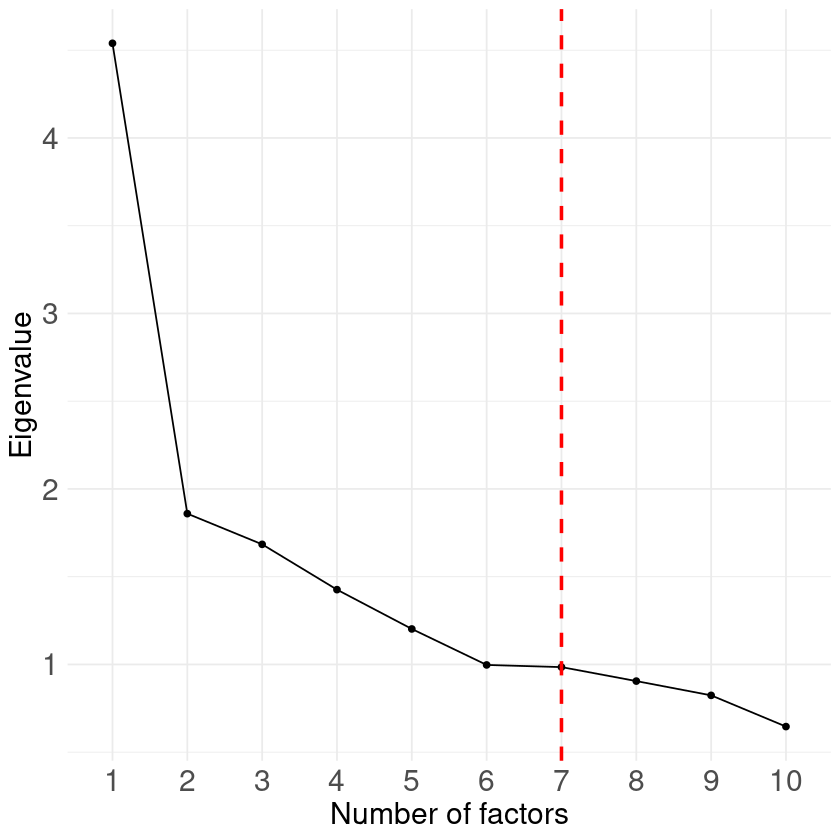

In [15]:
# Scree plot is a good rule of thumb to determine the best factors 
#n_factors <- length(solution$e.values)

solution <- fa(df.wa.nocountry, nfactors = 10, rotate = "promax", fm = "ml", scores="tenBerge", impute ="mean", max.iter = 1000 )

scree     <- data.frame(
               Factor_n =  as.factor(1:10), 
             Eigenvalue = solution$e.values[1:10])

pdf(file = "../../images/pdf-images/scree-plot.pdf",
  width     = 5,
  height    = 5 )

ggplot(scree, aes(x = Factor_n, y = Eigenvalue, group = 1)) + 
    geom_point() + 
    geom_line() +
    theme_minimal() +
    geom_vline(xintercept = 7 , linetype = "dashed", color='red',  linewidth=1) + 
    theme(axis.text=element_text(size=18), axis.title=element_text(size=18)) +
    xlab("Number of factors") +
    ylab("Eigenvalue") 

dev.off()

# A bar graph of factor loadings

Reference:
https://rstudio-pubs-static.s3.amazonaws.com/74109_5a0572586ce34b668a9280fd026602da.html#a-bar-graph-of-factor-loadings

,Variable,Far Well,Far Spring,Piped Indoors,Piped Outdoors,Vended,Nearby Surface,Nearby Improved
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Unprotected Well,0.92,-0.36,0.06,-0.05,0.12,0.00,0.15
2,Unprotected Spring,-0.13,0.72,0.09,-0.16,0.01,0.43,-0.01
3,Truck,0.10,-0.01,0.14,0.01,-0.06,0.01,-0.30
4,Tanker Cart,0.08,-0.10,0.06,-0.03,0.42,0.14,-0.04
5,T>30min,0.50,0.39,-0.02,-0.01,-0.09,-0.08,0.04
6,T<30min,0.21,0.15,-0.09,0.06,0.04,0.37,0.61


png 
  2

png 
  2

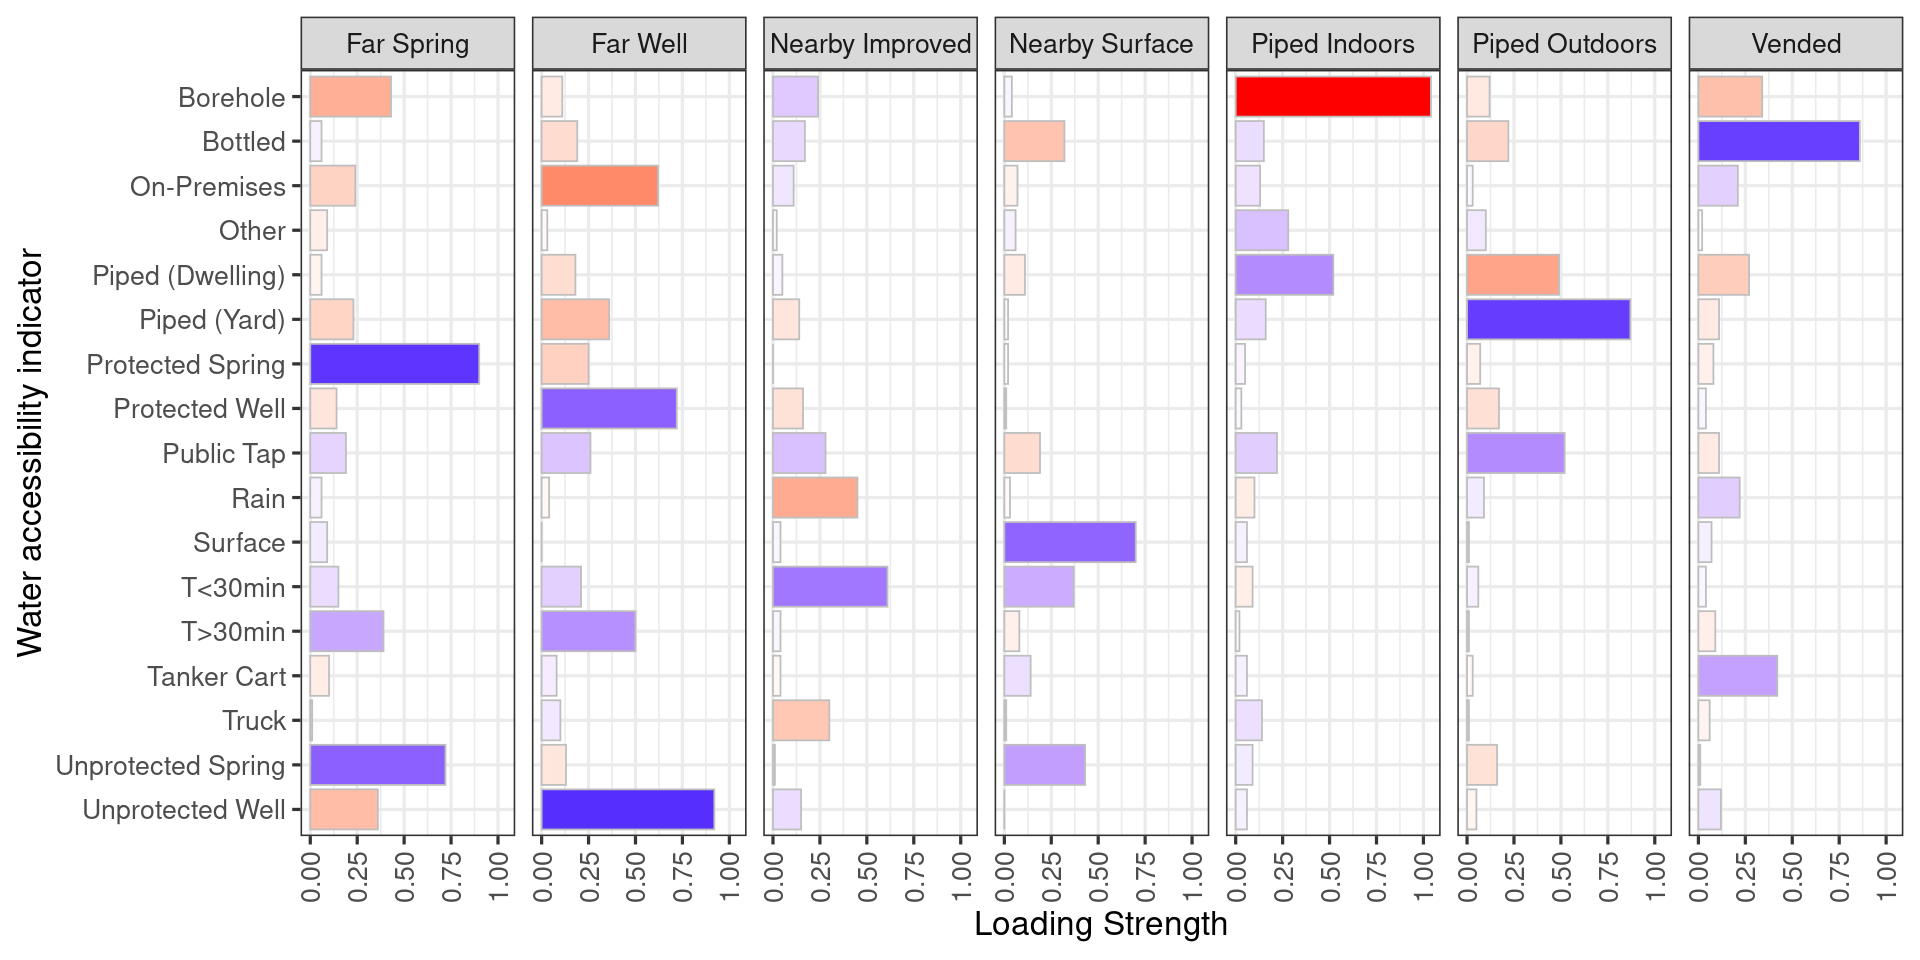

In [66]:
df.fl <- read_excel("../../results/factor-7-loadings.xlsx",sheet=1) #customized excel

df.fl <- as.data.frame(df.fl)

df.fl[,c(1)] <- as.factor(df.fl[,c(1)])
head(df.fl)

loadings.m <- melt(df.fl, id="Variable", # if the name is changed, then change the name in the excel as well
                   measure=c(    
        'Far Spring',
        'Far Well',
        'Nearby Improved',
        'Nearby Surface',
      'Piped Indoors' ,
      'Piped Outdoors' ,
      'Vended'
       ), 
                   variable.name="Factor", value.name="Loading")

#size of the plot 
#options(repr.plot.width=15, repr.plot.height=7)
options(repr.plot.width=16, repr.plot.height=8)
par(mar = c(1,1,1,1))
par(cex=1)

#For each ws (water sources), plot the loading as length and fill color of a bar
# note that the length will be the absolute value of the loading but the 
# fill color will be the signed value, more on this below
g <- ggplot(data = loadings.m, aes(x = Variable, y = abs(Loading), fill=Loading)) + 
  facet_wrap(~ Factor, nrow=1,  strip.position="top") + #place the factors in separate facets
  geom_bar(stat="identity" , aes(), color='gray') + #make the bars
  coord_flip() + #flip the axes so the test names can be horizontal  
  #define the fill color gradient: blue=positive, red=negative
  scale_fill_gradient2(name = "Loading", 
                       high = "blue", mid = "white", low = "red", 
                       midpoint=0, guide=F) +
  xlab("Water accessibility indicator") + 
  ylab("Loading Strength") + 
  theme_bw(base_size= 20) +  
  scale_x_discrete(limits = rev) + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5, size=16))

g + theme(legend.position="bottom")

png(
  "../../images/png-images/fa-7-loadings.png",
  width     = 14,
  height    = 5,
  units     = "in",
  res       = 700,
  #pointsize = 6 
)
g + theme(legend.position="bottom")
dev.off()

pdf(file = "../../images/pdf-images/fa-7-loadings.pdf"
  ,
  width     = 16,
  height    = 8 
   )
g + theme(legend.position="bottom")
dev.off()

# For Loop for FA

In [6]:
#For loop for factors of 4-7 fm = "minchi"
for (i in 4:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "promax", fm = "minchi" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    #print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)
    print(iteration$BIC)
    print(iteration$TLI)
    print(iteration$rms)
    print(iteration$STATISTIC)
    print(iteration$PVAL)
    print(iteration$objective)
    print(iteration$EBIC )
    print(iteration$dof)
    print(iteration$chi)
    print(iteration$RMSEA)
} 

[1] -149.8712
[1] 0.5139894
[1] 0.07425473
[1] 167.6228
[1] 3.213399e-09
[1] 2.667737
[1] -208.0127
[1] 74
[1] 109.4813
     RMSEA      lower      upper confidence 
 0.1309232  0.1059674  0.1592644  0.9000000 
[1] -120.648
[1] 0.4882458
[1] 0.06400577
[1] 141.0701
[1] 2.753781e-08
[1] 2.269224
[1] -180.3732
[1] 61
[1] 81.34485
     RMSEA      lower      upper confidence 
 0.1333825  0.1059175  0.1643193  0.9000000 
[1] -112.6251
[1] 0.6074006
[1] 0.05533547
[1] 97.60746
[1] 4.514153e-05
[1] 1.587113
[1] -149.4332
[1] 49
[1] 60.79935
     RMSEA      lower      upper confidence 
0.11575245 0.08298078 0.15124692 0.90000000 
[1] -97.21088
[1] 0.7057339
[1] 0.04629849
[1] 65.82658
[1] 0.003378166
[1] 1.082081
[1] -120.4751
[1] 38
[1] 42.56234
     RMSEA      lower      upper confidence 
0.09920157 0.05783114 0.14095585 0.90000000 


"none", "varimax", "quartimax", "bentlerT", "equamax", "varimin", "geominT" and "bifactor" are orthogonal rotations. "Promax", "promax", "oblimin", "simplimax", "bentlerQ, "geominQ" and "biquartimin" and "cluster" are possible oblique transformations of the solution. = rotation varimin = correction

Factoring method fm="minres" will do a minimum residual as will fm="uls".  fm="ols" differs very slightly from "minres". fm="wls" will do a weighted least squares (WLS) solution, fm="gls" does a generalized weighted least squares (GLS), fm="pa" will do the principal factor solution, fm="ml" will do a maximum likelihood factor analysis. fm="minchi" will minimize the sample size weighted chi square when treating pairwise correlations with different number of subjects per pair. fm ="minrank" will do a minimum rank factor analysis. "old.min" will do minimal residual the way it was done prior to April, 2017 (see discussion below). fm="alpha" will do alpha factor analysis as described in Kaiser and Coffey (1965)
Correction WLS and GLS, minrank, old.min
Correct for Oblimin works with minrank and old.min, ml, minchi,  = fm works with

In [7]:
#For loop for factors of 4-7 fm = "minrank" 
for (i in 4:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "promax", fm = "minrank" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$BIC)
    print(iteration$TLI)
    print(iteration$rms)
    print(iteration$STATISTIC)
    print(iteration$PVAL)
    print(iteration$objective)
    print(iteration$EBIC )
    print(iteration$dof)
    print(iteration$chi)
    print(iteration$RMSEA)
} 


[1] -109.791
[1] 0.3059272
[1] 0.07880537
[1] 207.703
[1] 1.258365e-14
[1] 3.305618
[1] -194.1825
[1] 74
[1] 123.3115
     RMSEA      lower      upper confidence 
 0.1567175  0.1331740  0.1840926  0.9000000 
[1] -92.77161
[1] 0.310079
[1] 0.06670218
[1] 168.9464
[1] 4.479558e-12
[1] 2.717637
[1] -173.3751
[1] 61
[1] 88.34293
     RMSEA      lower      upper confidence 
 0.1550839  0.1289284  0.1851401  0.9000000 
[1] -64.45358
[1] 0.2183226
[1] 0.05814903
[1] 145.7789
[1] 1.520132e-11
[1] 2.370389
[1] -143.0932
[1] 49
[1] 67.13928
     RMSEA      lower      upper confidence 
 0.1639074  0.1350047  0.1969808  0.9000000 
[1] -42.93439
[1] 0.13176
[1] 0.04852613
[1] 120.1031
[1] 1.895192e-10
[1] 1.974297
[1] -116.2808
[1] 38
[1] 46.75662
     RMSEA      lower      upper confidence 
 0.1714850  0.1388673  0.2086084  0.9000000 


In [8]:
#For loop for factors of 4-7 fm = "minrank" 
for (i in 4:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "promax", fm = "minrank" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}


Loadings:
     MRFA1 MRFA3 MRFA2 MRFA4
pwel  0.64        0.29      
uwel  0.87                  
bott -0.60        0.49      
watp -0.55 -0.34            
pspr -0.32  0.83            
uspr        0.88            
tmor  0.45  0.53            
pipy -0.30       -0.83      
ptap        0.32 -0.61      
phom       -0.38        0.53
bore  0.29 -0.46       -0.84
truc  0.25        0.22  0.59
rain -0.38        0.22      
ctan              0.34      
othw                    0.34
surw  0.20  0.38            
tles  0.40  0.42       -0.33

               MRFA1 MRFA3 MRFA2 MRFA4
SS loadings     2.78  2.70  1.68  1.67
Proportion Var  0.16  0.16  0.10  0.10
Cumulative Var  0.16  0.32  0.42  0.52

Loadings:
     MRFA1 MRFA3 MRFA2 MRFA4 MRFA5
pwel  0.70       -0.23            
uwel  0.97 -0.35                  
watp -0.56 -0.28                  
pspr -0.36  0.93                  
uspr        0.93                  
pipy -0.30 -0.35  0.99            
ptap              0.59       -0.30
bore  0.25 -0.42 -0

In [10]:
#For loop for factors of 4-7 fm = "ml"
for (i in 4:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "promax", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$BIC) 
    print(iteration$TLI)
    print(iteration$rms)
    print(iteration$STATISTIC)
    print(iteration$PVAL)
    print(iteration$objective)
    print(iteration$EBIC )
    print(iteration$dof)
    print(iteration$chi)
    print(iteration$RMSEA)
} 

[1] -155.9394
[1] 0.5454905
[1] 0.07266365
[1] 161.5546
[1] 1.818802e-08
[1] 2.571161
[1] -212.6542
[1] 74
[1] 104.8398
     RMSEA      lower      upper confidence 
 0.1265605  0.1012783  0.1551192  0.9000000 
[1] -141.6407
[1] 0.6224172
[1] 0.06062073
[1] 120.0774
[1] 9.714238e-06
[1] 1.931539
[1] -188.7497
[1] 61
[1] 72.96829
     RMSEA      lower      upper confidence 
0.11435299 0.08504696 0.14643504 0.90000000 
[1] -118.6551
[1] 0.6561049
[1] 0.05827336
[1] 91.57741
[1] 0.0002172846
[1] 1.489064
[1] -142.8058
[1] 49
[1] 67.42669
     RMSEA      lower      upper confidence 
 0.1082259  0.0742744  0.1443460  0.9000000 
[1] -97.62591
[1] 0.7101229
[1] 0.04654598
[1] 65.41155
[1] 0.003732864
[1] 1.075258
[1] -120.0189
[1] 38
[1] 43.01859
     RMSEA      lower      upper confidence 
0.09844459 0.05683249 0.14028934 0.90000000 


In [ ]:
# possible oblique transformations of the solution for better interpreation
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "oblimin", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "bentlerQ", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 2000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "promax", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}
#  are orthogonal rotations for stronger interpreation
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "varimax", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "bentlerT", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "geominT", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}

In [ ]:
df.wa.nocountry <- as.matrix(df.wa.nocountry)
scores <- as.matrix(scores.seven.factors)
df.seven.scores <-  scores
df.seven.scores #plot this without scaling 

# New FA 7 data frame

In [ ]:
# Without Scaling
df.wa.nocountry <- as.matrix(df.wa.nocountry)
scores <- as.matrix(scores.seven.factors)
df.seven.scores <-  scores
df.seven.scores <- cbind(df.wa,df.seven.scores)
score.no.scale <- df.seven.scores[,c(1,19:25)]
head(score.no.scale,7)
summary(score.no.scale)
write_xlsx(score.no.scale, '../../results/seven-scores-no-scale.xlsx')

In [ ]:
df.wa.nocountry <- as.matrix(df.wa.nocountry)
scores <- as.matrix(scores.seven.factors)
df.seven.scores <-  scores
df.seven.scores = as.data.frame(apply(as.matrix(df.seven.scores[,c(1:7)]), 2, rescale))
df.seven.scores <- cbind(df.wa,df.seven.scores)
df.seven.scores <- df.seven.scores[,c(1,19:25)]
head(df.seven.scores,7)
summary(df.seven.scores)
write_xlsx(df.seven.scores, '../../results/df-seven-scores.xlsx')

# Six factors - ml - promax

In [ ]:
solution.six <- fa(df.wa.nocountry, nfactors = 6, rotate = "promax", fm = "ml", scores="tenBerge", impute ="mean", max.iter = 1000 )
scores.six.factors = solution.six$scores
scores.six.factors = as.data.frame.matrix(scores.six.factors) #df.wa multiply by scores matrix
write_xlsx(scores.six.factors, '../../results/scores-6-factors.xlsx')
print(solution.six$loadings, digits=2, cutoff=.2, sort=TRUE) #sort out by the low numbers
df.wa.nocountry <- df.wa[,c(2:18)]
df.wa.nocountry <- as.matrix(df.wa.nocountry)
scores <- as.matrix(scores.six.factors)
df.six.scores <-  scores
df.six.scores = as.data.frame(apply(as.matrix(df.six.scores[,c(1:6)]), 2, rescale))
df.six.scores <- cbind(df.wa,df.six.scores)
df.six.scores <- df.six.scores[,c(1,19:24)]
head(df.six.scores,7)
summary(df.six.scores)
write_xlsx(df.six.scores, '../../archive-explore/df-six-scores.xlsx')

# Five factors - ml - promax

In [1]:
solution.five <- fa(df.wa.nocountry, nfactors = 5, rotate = "promax", fm = "ml", scores="tenBerge", impute ="mean", max.iter = 1000 )
scores.five.factors = solution.five$scores
scores.five.factors = as.data.frame.matrix(scores.five.factors) #df.wa multiply by scores matrix
write_xlsx(scores.five.factors, '../../results/scores-5-factors.xlsx')
print(solution$loadings, digits=2, cutoff=.2, sort=TRUE) #sort out by the low numbers
df.wa.nocountry <- df.wa[,c(2:18)]
df.wa.nocountry <- as.matrix(df.wa.nocountry)
scores <- as.matrix(scores.five.factors)
df.five.scores <-  scores
df.five.scores = as.data.frame(apply(as.matrix(df.five.scores[,c(1:5)]), 2, rescale))
df.five.scores <- cbind(df.wa,df.five.scores)
df.five.scores <- df.five.scores[,c(1,19:23)]
head(df.five.scores,7)
summary(df.five.scores)
write_xlsx(df.five.scores, '../../archive-explore/df-five-scores.xlsx')

ERROR: Error in fa(df.wa.nocountry, nfactors = 5, rotate = "promax", fm = "ml", : could not find function "fa"
